In [59]:
#!/usr/bin/env python
# coding: utf-8
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import random
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

import csv

warnings.filterwarnings('ignore')

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
path = "/content/drive/MyDrive/disciplinas UFRB/Tópicos esp IA/co2-ppm-mauna-loa-19651980.csv"

data = pd.read_csv(path,sep=',' )

data = data.to_numpy()[0:-1,:]
data

array([['1965-01', '319.32'],
       ['1965-02', '320.36'],
       ['1965-03', '320.82'],
       ['1965-04', '322.06'],
       ['1965-05', '322.17'],
       ['1965-06', '321.95'],
       ['1965-07', '321.20'],
       ['1965-08', '318.81'],
       ['1965-09', '317.82'],
       ['1965-10', '317.37'],
       ['1965-11', '318.93'],
       ['1965-12', '319.09'],
       ['1966-01', '319.94'],
       ['1966-02', '320.98'],
       ['1966-03', '321.81'],
       ['1966-04', '323.03'],
       ['1966-05', '323.36'],
       ['1966-06', '323.11'],
       ['1966-07', '321.65'],
       ['1966-08', '319.64'],
       ['1966-09', '317.86'],
       ['1966-10', '317.25'],
       ['1966-11', '319.06'],
       ['1966-12', '320.26'],
       ['1967-01', '321.65'],
       ['1967-02', '321.81'],
       ['1967-03', '322.36'],
       ['1967-04', '323.67'],
       ['1967-05', '324.17'],
       ['1967-06', '323.39'],
       ['1967-07', '321.93'],
       ['1967-08', '320.29'],
       ['1967-09', '318.58'],
       ['1

In [62]:
def discretizacao(data):
  #ano, mes, co2, y

  tamanho_x = data.shape[0] - 1

  dataset = []
  for i in range(tamanho_x - 1):
    d = data[i,0]
    d = d.split('-')

    ano = d[0]
    mes = d[1]

    v = []
    v.append(ano)
    v.append(mes)
    v.append(data[i,1])

    v.append(data[i + 1,1])
    dataset.append(v)

  return pd.DataFrame(dataset, columns=[["ano", "mes", "co2", "y"]])

In [63]:
df = discretizacao(data)
df

,ano,mes,co2,y
0,1965,01,319.32,320.36
1,1965,02,320.36,320.82
2,1965,03,320.82,322.06
3,1965,04,322.06,322.17
4,1965,05,322.17,321.95
...,...,...,...,...
185,1980,06,340.87,339.25
186,1980,07,339.25,337.19
187,1980,08,337.19,335.49
188,1980,09,335.49,336.63


In [64]:
df["ano"] = df["ano"].astype('int')
df["mes"] = df["mes"].astype('int')
df["co2"] = df["co2"].astype('float')
df["y"] = df["y"].astype('float')

print(df.dtypes)

X, y = df.iloc[:, :3], df.iloc[:, 3]

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=0, shuffle=False)

scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, shuffle=False)

model = Sequential()

model.add(Dense(36, input_shape=(3,), activation='relu'))
model.add(Dense(18, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mean_absolute_error', 'mse'])

batch_size = 2
epochs = 200

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))

ano      int64
mes      int64
co2    float64
y      float64
dtype: object
Epoch 1/200
68/68 [==============================] - 1s 5ms/step - loss: 105824.8203 - mean_absolute_error: 325.2787 - mse: 105824.8203 - val_loss: 110514.3750 - val_mean_absolute_error: 332.4276 - val_mse: 110514.3750
Epoch 2/200
68/68 [==============================] - 0s 3ms/step - loss: 103749.4531 - mean_absolute_error: 322.0735 - mse: 103749.4531 - val_loss: 104202.7422 - val_mean_absolute_error: 322.7940 - val_mse: 104202.7422
Epoch 3/200
68/68 [==============================] - 0s 4ms/step - loss: 93739.9375 - mean_absolute_error: 306.0381 - mse: 93739.9375 - val_loss: 78578.2188 - val_mean_absolute_error: 280.2821 - val_mse: 78578.2188
Epoch 4/200
68/68 [==============================] - 0s 5ms/step - loss: 64082.6094 - mean_absolute_error: 251.6620 - mse: 64082.6094 - val_loss: 25907.7480 - val_mean_absolute_error: 160.4695 - val_mse: 25907.7480
Epoch 5/200
68/68 [==============================] - 0s 4m

In [65]:
y_pred = model.predict(x_test)

1/1 [==============================] - 0s 62ms/step


In [66]:
auxDT=[]
for a in y_test:
    a1=[]
    a1.append(float(a))
    auxDT.append(a1)

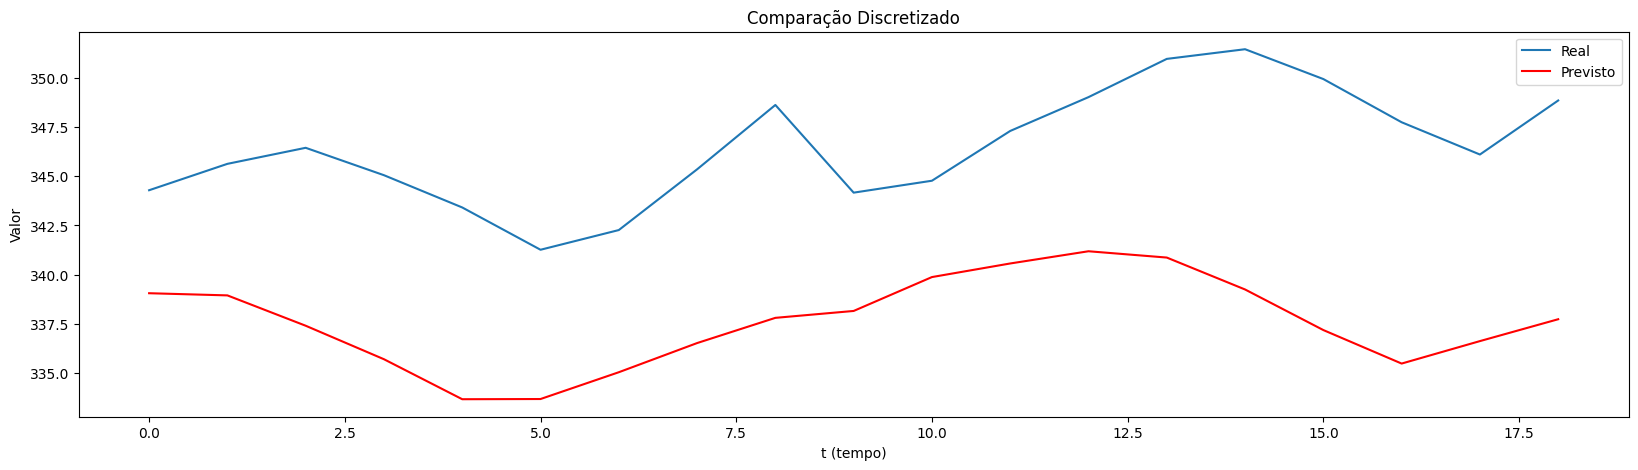

In [67]:
plt.figure(figsize=(20, 5))
plt.plot(y_pred, label="Real")
plt.plot(auxDT, color='red', label = 'Previsto')
plt.title('Comparação Discretizado')
plt.legend()
plt.xlabel("t (tempo)")
plt.ylabel('Valor')
plt.show()

In [68]:
def discretizacao_trig(data):
  #sen(mes), sen(ano), co2, y

  tamanho_x = data.shape[0] - 1

  dataset = []
  for i in range(tamanho_x - 1):
    d = data[i,0]
    d = d.split('-')

    ano = d[0]
    mes = d[1]

    v = []
    v.append(np.sin(int(mes)))
    v.append(np.sin(int(ano)))
    v.append(data[i,1])
    v.append(data[i + 1,1])
    dataset.append(v)

  return pd.DataFrame(dataset, columns=[["ano", "mes", "co2", "y"]])

In [69]:
df_trig = discretizacao_trig(data)
df_trig

,ano,mes,co2,y
0,0.841471,-0.997809,319.32,320.36
1,0.909297,-0.997809,320.36,320.82
2,0.141120,-0.997809,320.82,322.06
3,-0.756802,-0.997809,322.06,322.17
4,-0.958924,-0.997809,322.17,321.95
...,...,...,...,...
185,-0.279415,0.715003,340.87,339.25
186,0.656987,0.715003,339.25,337.19
187,0.989358,0.715003,337.19,335.49
188,0.412118,0.715003,335.49,336.63


In [70]:
df_trig["ano"] = df_trig["ano"].astype('float')
df_trig["mes"] = df_trig["mes"].astype('float')
df_trig["co2"] = df_trig["co2"].astype('float')
df_trig["y"] = df_trig["y"].astype('float')

print(df_trig.dtypes)

X, y = df_trig.iloc[:, :3], df_trig.iloc[:, 3]

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=0, shuffle=False)

scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, shuffle=False)

model = Sequential()

model.add(Dense(36, input_shape=(3,), activation='relu'))
model.add(Dense(18, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mean_absolute_error', 'mse'])

batch_size = 2
epochs = 200

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))

ano    float64
mes    float64
co2    float64
y      float64
dtype: object
Epoch 1/200
68/68 [==============================] - 1s 6ms/step - loss: 105941.0234 - mean_absolute_error: 325.4564 - mse: 105941.0234 - val_loss: 110866.1094 - val_mean_absolute_error: 332.9568 - val_mse: 110866.1094
Epoch 2/200
68/68 [==============================] - 0s 3ms/step - loss: 104181.9922 - mean_absolute_error: 322.7426 - mse: 104181.9922 - val_loss: 105874.5547 - val_mean_absolute_error: 325.3727 - val_mse: 105874.5547
Epoch 3/200
68/68 [==============================] - 0s 4ms/step - loss: 93185.0078 - mean_absolute_error: 305.0830 - mse: 93185.0078 - val_loss: 82747.8594 - val_mean_absolute_error: 287.5645 - val_mse: 82747.8594
Epoch 4/200
68/68 [==============================] - 0s 3ms/step - loss: 59812.4102 - mean_absolute_error: 242.4205 - mse: 59812.4102 - val_loss: 34213.5625 - val_mean_absolute_error: 183.5455 - val_mse: 34213.5625
Epoch 5/200
68/68 [==============================] - 0s 3m

In [71]:
y_pred = model.predict(x_test)

1/1 [==============================] - 0s 63ms/step


In [72]:
auxDT=[]
for a in y_test:
    a1=[]
    a1.append(float(a))
    auxDT.append(a1)

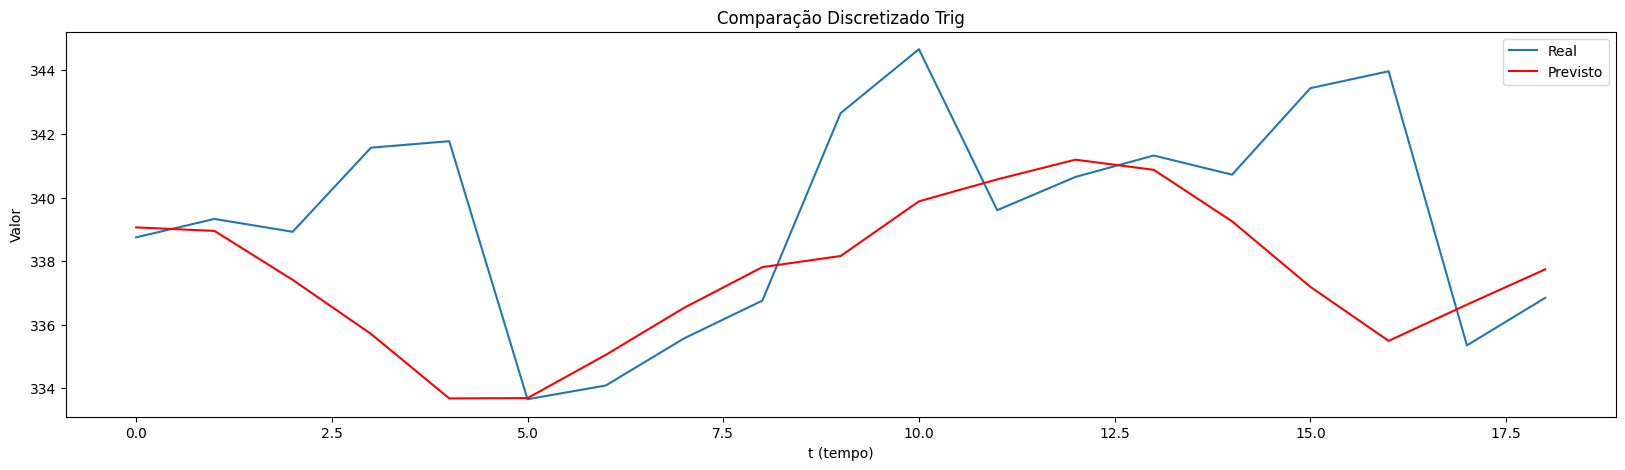

In [73]:
plt.figure(figsize=(20, 5))
plt.plot(y_pred, label="Real")
plt.plot(auxDT, color='red', label = 'Previsto')
plt.title('Comparação Discretizado Trig')
plt.legend()
plt.xlabel("t (tempo)")
plt.ylabel('Valor')
plt.show()

In [74]:
def janelamento(data, janela):
  dataset = []
  tamanho_x = data.shape[0] - 1

  t=0
  while(t<tamanho_x - janela):
    y = 0
    row = []
    while(y < janela):
      if(y+t < tamanho_x):
        row.append(data[y+t,1])
      else:
        break
      y = y + 1

    row.append(data[y+t,1])

    dataset.append(row)

    t = t + 1


  dataset = pd.DataFrame(dataset)

  #df["co2"] = df["co2"].astype('float')

  dataset = dataset.astype(np.float)

  return pd.DataFrame(dataset)

In [75]:
df_janela = janelamento(data, 6)
df_janela

,0,1,2,3,4,5,6
0,319.32,320.36,320.82,322.06,322.17,321.95,321.20
1,320.36,320.82,322.06,322.17,321.95,321.20,318.81
2,320.82,322.06,322.17,321.95,321.20,318.81,317.82
3,322.06,322.17,321.95,321.20,318.81,317.82,317.37
4,322.17,321.95,321.20,318.81,317.82,317.37,318.93
...,...,...,...,...,...,...,...
180,337.81,338.16,339.88,340.57,341.19,340.87,339.25
181,338.16,339.88,340.57,341.19,340.87,339.25,337.19
182,339.88,340.57,341.19,340.87,339.25,337.19,335.49
183,340.57,341.19,340.87,339.25,337.19,335.49,336.63


In [76]:
print(df_janela.dtypes)

X, y = df_janela.iloc[:, :6], df_janela.iloc[:, 6]

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=0, shuffle=False)

scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, shuffle=False)

model = Sequential()

model.add(Dense(36, input_shape=(6,), activation='relu'))
model.add(Dense(18, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mean_absolute_error', 'mse'])

batch_size = 2
epochs = 200

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
dtype: object
Epoch 1/200
66/66 [==============================] - 1s 6ms/step - loss: 105601.9375 - mean_absolute_error: 324.9379 - mse: 105601.9375 - val_loss: 108569.4688 - val_mean_absolute_error: 329.4898 - val_mse: 108569.4688
Epoch 2/200
66/66 [==============================] - 0s 5ms/step - loss: 100446.8047 - mean_absolute_error: 316.8744 - mse: 100446.8047 - val_loss: 89515.7812 - val_mean_absolute_error: 299.1728 - val_mse: 89515.7812
Epoch 3/200
66/66 [==============================] - 0s 4ms/step - loss: 76352.3828 - mean_absolute_error: 274.9798 - mse: 76352.3828 - val_loss: 30677.4453 - val_mean_absolute_error: 174.6699 - val_mse: 30677.4453
Epoch 4/200
66/66 [==============================] - 0s 4ms/step - loss: 30839.4453 - mean_absolute_error: 160.7505 - mse: 30839.4453 - val_loss: 5041.4580 - val_mean_absolute_error: 63.1542 - val_mse: 5041.4580
Epoch 5/200
66/66 [=============

In [77]:
y_pred = model.predict(x_test)

1/1 [==============================] - 0s 144ms/step


In [78]:
auxDT=[]
for a in y_test:
    a1=[]
    a1.append(float(a))
    auxDT.append(a1)

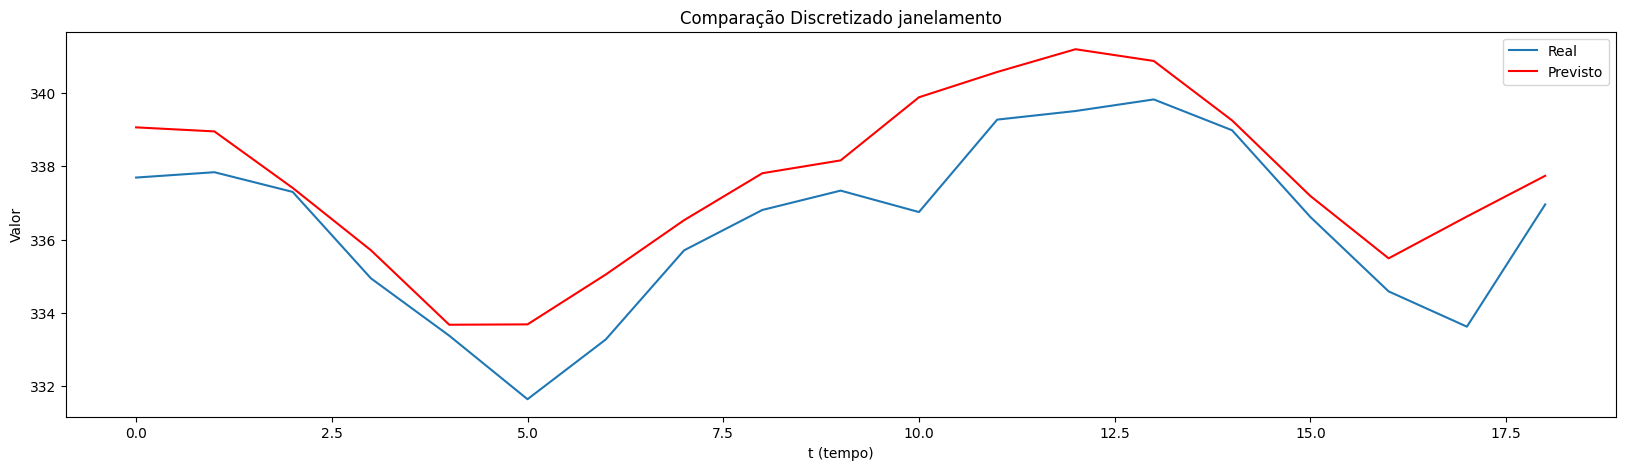

In [80]:
plt.figure(figsize=(20, 5))
plt.plot(y_pred, label="Real")
plt.plot(auxDT, color='red', label = 'Previsto')
plt.title('Comparação Discretizado janelamento')
plt.legend()
plt.xlabel("t (tempo)")
plt.ylabel('Valor')
plt.show()